In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

REGRESSION MODEL ON PROPERTY PRICE TRAIN

In [83]:
prop = pd.read_csv(r'D:\datasets\Property_Price_Train.csv')

In [84]:
prop.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
prop.shape

(1459, 81)

PRE PROCESSING

In [86]:
prop.isnull().sum()[prop.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [87]:
prop = prop.drop(['Lane_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis =1)


#more than 50% nulls

In [88]:
# FILLING NULLS
prop.Lot_Extent = prop.Lot_Extent.fillna(prop.Lot_Extent.median())

prop.Brick_Veneer_Type = prop.Brick_Veneer_Type.fillna('None')
prop.Brick_Veneer_Area = prop.Brick_Veneer_Area.fillna(0)
prop.Basement_Height = prop.Basement_Height.fillna('none')
prop.Basement_Condition= prop.Basement_Condition.fillna('none')
prop.Exposure_Level = prop.Exposure_Level.fillna('No')
prop.BsmtFinType1 = prop.BsmtFinType1.fillna('None')
prop.BsmtFinType2 = prop.BsmtFinType2.fillna('None')
prop.Electrical_System = prop.Electrical_System.fillna('SBrkr')

prop.Garage = prop.Garage.fillna('NoGrg')
prop.Garage_Built_Year = prop.Garage_Built_Year.fillna(2005)
prop.Garage_Finish_Year = prop.Garage_Finish_Year.fillna('Unf')
prop.Garage_Quality = prop.Garage_Quality.fillna('TA')
prop.Garage_Condition = prop.Garage_Condition.fillna('TA')


In [89]:
prop.isnull().sum()[prop.isnull().sum()>0] 

Series([], dtype: int64)

In [90]:
prop.columns[prop.dtypes == 'object']


Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [91]:
prop.Property_Shape.replace({'Reg':0,'IR1':1,'IR2':2,'IR3':3},inplace = True)     #Ordinal Data

In [92]:
prop[prop.select_dtypes(include = 'object').columns] =prop[prop.select_dtypes(include = 'object').columns].apply(le.fit_transform)
#non-numeric to numeric

In [93]:
prop.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,0,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [94]:
prop = prop.drop(['Id'],axis = 1)          #unique value column

In [95]:
prop.head(3)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,0,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500


In [96]:
def remove_outliers(df,  col, k  ):   
    mean = df[col].mean()
    global df1
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]         
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
    print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])

In [97]:
#removing Outliers

remove_outliers(prop,  'Sale_Price', 2  )

(1396, 75)
Number of outliers removed == > 63


In [98]:
prop = df1

##### if correlation b/w a x column and y variable is close to zero then there is no point using that column for model building

In [99]:
prop.iloc[:,0:-1].columns   # X variables

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',


In [100]:
x_col =prop.iloc[:,0:-1].columns

In [101]:
cor_list = []
for col in x_col:
    cor_list.append(prop.Sale_Price.corr(prop[col]))

In [102]:
cols_corr =pd.DataFrame()
cols_corr['Columns'] = x_col
cols_corr['corelation'] = cor_list

In [103]:
df2 =cols_corr[(cols_corr.corelation < -.3) | (cols_corr.corelation>.3) ]

In [104]:
l1 = list(df2.Columns)


In [105]:
len(l1)

20

In [106]:
l1.append('Sale_Price')

In [107]:
prop1 = prop.loc[:,l1] 

In [109]:
prop1.shape

(1396, 21)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

RANDOM SAMPLING

In [111]:
prop_x = prop1.iloc[:,0:-1]
prop_y=prop1.iloc[:,-1]

In [113]:
scaled_x = pd.DataFrame(scaler.fit_transform(prop_x),columns=prop_x.columns)

In [115]:
scaled_x.head()

,Overall_Material,Construction_Year,Remodel_Year,Brick_Veneer_Area,Exterior_Material,Foundation_Type,Basement_Height,Total_Basement_Area,Heating_Quality,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Full_Bathroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size
0,0.795399,1.098385,0.917421,0.673141,-0.998902,0.802392,-0.467908,-0.411662,-0.914471,-0.771594,1.231471,0.494015,0.859580,-0.542826,1.025470,-0.922812,-0.777862,0.968472,-0.339953,0.392568
1,0.014543,0.198613,-0.389535,-0.564467,0.661178,-0.507712,-0.467908,0.586017,-0.914471,0.364624,-0.797804,-0.440455,0.859580,0.788957,-0.268885,0.659799,-0.777862,-0.122655,-0.339953,0.392568
2,0.795399,1.031735,0.869016,0.458454,-0.998902,0.802392,-0.467908,-0.254393,-0.914471,-0.592486,1.259986,0.652542,0.859580,-0.542826,-0.268885,0.659799,-0.777862,0.887648,-0.339953,0.392568
3,0.795399,-1.834206,-0.679969,-0.564467,0.661178,-1.817816,0.757607,-0.657396,0.230463,-0.477745,0.998604,0.508616,-1.006631,-0.542826,0.378293,0.659799,1.262336,0.766412,0.915534,1.779974
4,1.576255,0.998410,0.772204,1.645547,-0.998902,0.802392,-0.467908,0.298509,-0.914471,0.037191,1.704335,1.511921,0.859580,-0.542826,1.672648,0.659799,-0.777862,0.847236,-0.339953,1.779974


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
prop_train_x,prop_test_x,prop_train_y,prop_test_y = train_test_split(scaled_x,prop_y,test_size = .2)  

In [118]:
prop_train_y.head(3)

426     275000
1080    145000
1152    230000
Name: Sale_Price, dtype: int64

In [119]:
prop_test_x.shape

(280, 20)

MODEL BUILDING

## Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [121]:
linreg.fit(prop_train_x,prop_train_y)

LinearRegression()

In [122]:
pred = linreg.predict(prop_test_x)

In [123]:
pred

array([207061.23460844, 219774.88645338,  67870.22249193, 119750.57667982,
       148651.36181757, 124399.00720295, 222719.3157418 , 138698.73090166,
       165561.73175091, 160612.15295567, 164298.08591937, 174536.24328957,
       104917.69893798, 102213.91278967, 433676.16670187, 216499.05015853,
       176948.29378962, 126812.15439842, 129055.96978146, 113850.13504601,
       170622.58957017, 138603.5310362 , 115356.28350828, 157874.57514693,
       142071.41408059, 195586.23463341, 206782.85104194, 205356.31804165,
        93312.12969488, 160242.47007798,  95305.16464155, 141796.81543158,
       184932.22828122,  84032.91347565, 141618.69581427, 110823.89065752,
       284345.35826221, 190205.3532148 , 140842.19768162, 190038.13677974,
       167771.29485591, 115692.58359382, 207124.89338547, 233471.49785701,
       255300.86678529, 138883.38096552, 174594.38185962, 147389.9454324 ,
       191514.01762643,  84404.34405119, 126284.30234037, 210912.00370735,
       213990.856715  ,  

In [124]:
len(pred)

280

In [125]:
linreg.intercept_          #Bo

170185.8487323176

In [126]:
linreg.coef_              #Bn

array([14714.03399707,  5597.76807861,  5724.14436386,  1258.40227312,
       -1766.30891716,  -323.25737451, -3075.94182461,  3464.70378287,
       -2740.36509749, 18329.82912059, 18545.73971958, -4815.53565881,
        -454.76954023, -5039.52446064,  1127.60198453,  5966.64113808,
       -1869.02489623,  -890.14807652, -2150.41365485,  7688.22466178])

In [127]:
Rsqr = linreg.score(prop_train_x,prop_train_y)
print('Rsqr:', Rsqr)           #range 0-1  (higher the better)

Rsqr: 0.8053782249573234


In [128]:
N = prop_train_x.shape[0]
K = prop_train_x.shape[1]

AdRsqr = 1-((1-Rsqr)*(N-1)/(N-K-1))
print('AdRsqr:', AdRsqr)             #range 0-Rsqr   (higher,better)

AdRsqr: 0.8018234893401055


In [129]:
pred_train = linreg.predict(prop_train_x)

In [130]:
err_train = prop_train_y - pred_train
err_train

426      58676.914235
1080    -30783.105802
1152     12593.523446
858     -29838.146495
155     -15634.364600
1006    -20615.297446
1146      1613.986071
326      76664.799673
394      10447.912786
1189    -21734.691488
372       4592.118846
1413      4688.636544
362      -5615.299858
1130    -22312.055381
1293    -22389.666940
1282      8138.689459
705     -25757.451292
929      -6926.625134
284     -11260.511627
1273     -5127.762726
1249     16072.521526
1436     19706.494893
679      13410.042230
360        517.391852
943     -11478.361793
1380     -5827.512794
956     -34226.824378
1284    -24464.516827
375       1997.053492
497      28575.442140
520      30334.157388
100       -573.666607
27       45649.559949
265     -12266.638334
318      -3608.887784
347     -21749.959018
46       -6583.501434
1235     10382.686485
1019     -6521.803976
719       4856.835380
1070     24613.523244
1054     12630.476054
76       41581.795127
88        3793.347782
1159     -4990.797159
768     -2

In [131]:
np.mean(err_train)          #should be zero

1.1578943299990828e-11

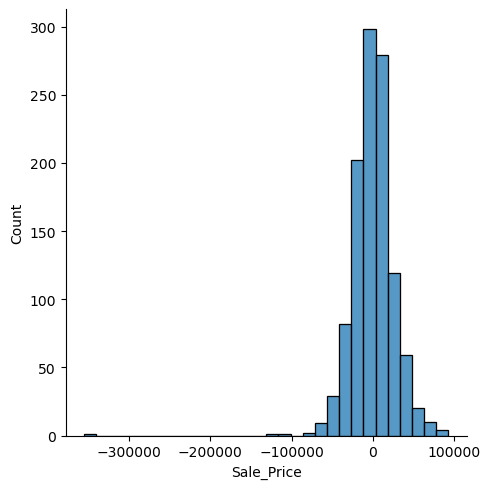

In [132]:
sns.displot(err_train,bins = 30);  
plt.show()                                   #errors are normally distributed

In [133]:
err_train.kurtosis()      #for normal dist kurt = value+3
# normal dist  (k = 0)

29.816230843517726

In [134]:
27.510530133342808 + 3

30.510530133342808

In [135]:
err_train.skew()          #skew should be zero

-2.0923452432774443

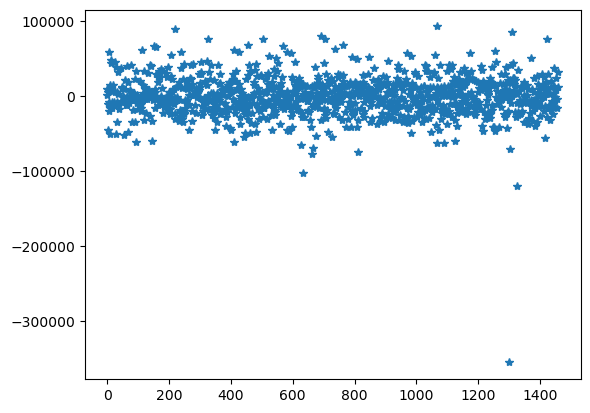

In [136]:
plt.plot(err_train,'*')
plt.show()                          #there is no pattern in errors

In [137]:
pred_actual = pd.DataFrame()

In [138]:
pred_actual['Actual'] = prop_train_y
pred_actual['Predicted'] = pred_train

In [139]:
pred_actual.head()

,Actual,Predicted
426,275000,216323.085765
1080,145000,175783.105802
1152,230000,217406.476554
858,152000,181838.146495
155,79000,94634.364600


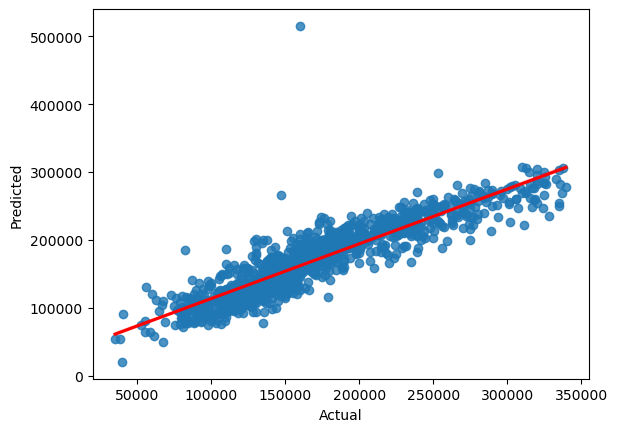

In [151]:

sns.regplot(x='Actual', y='Predicted', data=pred_actual, line_kws={'color': 'red'})
plt.show()


In [142]:
pred_test = linreg.predict(prop_test_x)
err_test = prop_test_y - pred_test

MSE = np.mean(np.square(err_test))
print('MSE:', MSE)


RMSE = np.sqrt(MSE)
print('RMSE:',RMSE)


MAPE = np.mean(np.abs(err_test*100/prop_test_y))
print('MAPE:', MAPE)

MAE = np.mean(np.abs(err_test))
print('MAE:', MAE)

MSE: 682125892.2905216
RMSE: 26117.539935654768
MAPE: 11.384139025001845
MAE: 17831.386829073104


In [146]:
mse = np.mean(np.square(err_train))
print('MSE:', mse)


rmse = np.sqrt(mse)
print('RMSE:',rmse)


mape = np.mean(np.abs(err_train*100/prop_train_y))
print('MAPE:', mape)

mae = np.mean(np.abs(err_train))
print('MAE:', mae)

MSE: 695224938.7412282
RMSE: 26367.11851418786
MAPE: 11.988699827792997
MAE: 18510.792247358444


In [143]:
err_train.max()

92854.4638303284

In [144]:
features_coef = pd.DataFrame()
features_coef['features'] = prop_train_x.columns
features_coef['slope'] = linreg.coef_

In [145]:
features_coef.head()

,features,slope
0,Overall_Material,14714.033997
1,Construction_Year,5597.768079
2,Remodel_Year,5724.144364
3,Brick_Veneer_Area,1258.402273
4,Exterior_Material,-1766.308917


## Ridge, Lasso & ElasticNet

In [152]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
rdg = Ridge()
las = Lasso()
elnet = ElasticNet()

In [153]:
rdg.fit(prop_train_x,prop_train_y)

Ridge()

In [154]:
predtest_rdg = rdg.predict(prop_test_x)
predtrain_rdg = rdg.predict(prop_train_x)
err_train_rdg = prop_train_y-predtrain_rdg
err_test_rdg = prop_test_y - predtest_rdg

In [155]:
Rsqr_rdg = rdg.score(prop_train_x,prop_train_y)

AdRsqr_rdg = 1-((1-Rsqr_rdg)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_rdg )
print('AdRsqr for train data:', AdRsqr_rdg)

Rsquare for train data: 0.8053571532422992
AdRsqr for train data: 0.8018020327535741


In [156]:
print('MSE for train data:',np.mean(np.square(err_train_rdg)) )
print('MSE for test data:',np.mean(np.square(err_test_rdg)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_rdg))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_rdg))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_rdg*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_rdg*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_rdg)) )
print('MAE for test data:',np.mean(np.abs(err_test_rdg)))

MSE for train data: 695300210.8005022
MSE for test data: 680068307.0528948


RMSE for train data: 26368.545860560876
RMSE for test data: 26078.11931587274


MAPE for train data: 11.987764013707071
MAPE for test data: 11.350740311123383


MAE for train data: 18518.803341847397
MAE for test data: 17792.29316023871


## Lasso

In [157]:
las.fit(prop_train_x,prop_train_y)

Lasso()

In [159]:
predtest_las = las.predict(prop_test_x)
predtrain_las = las.predict(prop_train_x)
err_train_las = prop_train_y-predtrain_las
err_test_las = prop_test_y - predtest_las

In [160]:
Rsqr_las = las.score(prop_train_x,prop_train_y)

AdRsqr_las = 1-((1-Rsqr_las)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_las)
print('AdRsqr for train data:', AdRsqr_las)

Rsquare for train data: 0.8053779841105896
AdRsqr for train data: 0.8018232440943447


In [161]:
print('MSE for train data:',np.mean(np.square(err_train_las)) )
print('MSE for test data:',np.mean(np.square(err_test_las)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_las))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_las))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_las*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_las*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_las)) )
print('MAE for test data:',np.mean(np.abs(err_test_las)))

MSE for train data: 695225799.0902611
MSE for test data: 681913657.1314217


RMSE for train data: 26367.134828992344
RMSE for test data: 26113.476542418124


MAPE for train data: 11.988401355116805
MAPE for test data: 11.38071045758537


MAE for train data: 18511.197456645947
MAE for test data: 17827.45779836021


## ELASTICNET

In [162]:
elnet.fit(prop_train_x,prop_train_y)

ElasticNet()

In [163]:
predtest_EN = elnet.predict(prop_test_x)
predtrain_EN = elnet.predict(prop_train_x)
err_train_EN = prop_train_y-predtrain_EN
err_test_EN = prop_test_y - predtest_EN

In [164]:
Rsqr_EN = elnet.score(prop_train_x,prop_train_y)

AdRsqr_EN= 1-((1-Rsqr_EN)*(N-1)/(N-K-1))

print('Rsquare for train data:',Rsqr_EN)
print('AdRsqr for train data:', AdRsqr_EN)

Rsquare for train data: 0.7940214638195544
AdRsqr for train data: 0.7902592987751627


In [165]:
print('MSE for train data:',np.mean(np.square(err_train_EN)) )
print('MSE for test data:',np.mean(np.square(err_test_EN)) )
print('\n')
print('RMSE for train data:',np.sqrt(np.mean(np.square(err_train_EN))) )
print('RMSE for test data:',np.sqrt(np.mean(np.square(err_test_EN))) )
print('\n')
print('MAPE for train data:',np.mean(np.abs(err_train_EN*100/prop_train_y)) )
print('MAPE for test data:',np.mean(np.abs(err_test_EN*100/prop_test_y)))
print('\n')
print('MAE for train data:',np.mean(np.abs(err_train_EN)) )
print('MAE for test data:',np.mean(np.abs(err_test_EN)))

MSE for train data: 735793387.7987545
MSE for test data: 674193574.1115679


RMSE for train data: 27125.511751831604
RMSE for test data: 25965.237801945274


MAPE for train data: 12.338684383119837
MAPE for test data: 11.285940468407073


MAE for train data: 19151.013017546087
MAE for test data: 17759.880530865245


##### Linear regression, Ridge regression, Lasso regression, and ElasticNet are all techniques used in regression analysis, which is a method for modeling the relationship between a dependent variable and one or more independent variables.
The main difference between these techniques is in how they handle the issue of overfitting, which is when a model is too complex and fits the training data too closely, leading to poor generalization performance on new data.


Linear regression: This is the most basic form of regression, where a linear relationship is assumed between the independent variables and the dependent variable. The goal is to find the coefficients that best fit the data, based on the ordinary least squares (OLS) method. However, this method does not take into account the issue of overfitting.
    
Ridge regression: This method adds a regularization term to the OLS method, which penalizes large coefficients and shrinks them towards zero. This helps to reduce the variance of the model and improve its generalization performance. Ridge regression works well when there are many correlated variables in the dataset.
    
Lasso regression: This method also adds a regularization term to the OLS method, but it uses the L1 norm instead of the L2 norm used by Ridge regression. The L1 norm shrinks some coefficients to exactly zero, effectively performing feature selection and producing a more interpretable model. Lasso regression works well when there are many irrelevant variables in the dataset.
    
ElasticNet: This method combines the L1 and L2 norms in the regularization term, allowing for both feature selection and coefficient shrinkage. This makes it a more flexible method that works well when there are both correlated and irrelevant variables in the dataset.

In summary, Linear regression is the most basic method that does not take into account the issue of overfitting, Ridge regression reduces the variance of the model by penalizing large coefficients, Lasso regression performs feature selection by shrinking some coefficients to exactly zero, and ElasticNet combines the L1 and L2 norms to provide a more flexible method.


## Conclusion

###### Based on the regression algorithms used in the model, it appears that they are providing similar results. However, when implementing Lasso regularization (L1), the model is able to prevent overfitting by shrinking some of the coefficients to zero. This selective coefficient shrinkage improves the model's ability to predict the sale price of properties with greater accuracy, achieving around 80% or higher. Therefore, the Lasso regularization technique has been utilized to optimize the predictive accuracy of the model.